In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
myData = pd.read_csv("/home/lin/教材/MearchineLearning/assignmentOneData/FinancialCrises.csv")
myData['credit_to_GDP'] = myData['loans1']/myData['gdp']
myData['bankAsset_to_GDP'] = myData['bassets2']/myData['gdp']
myData['money_to_GDP'] = myData['money']/myData['gdp']
myData['credit_to_money'] = myData['loans1']/myData['money']
myData['bank_asset_to_money'] = myData['bassets2']/myData['money']

In [3]:
myData.describe()

,year,rgdpbarro,rgdp,loans1,bassets2,govass,narrowm,money,gdp,iy,...,pop,stir,ltrate,crisisST,stocks,credit_to_GDP,bankAsset_to_GDP,money_to_GDP,credit_to_money,bank_asset_to_money
count,1946.000000,1946.000000,1946.000000,1.703000e+03,1.586000e+03,7.230000e+02,1.791000e+03,1.742000e+03,1.771000e+03,1744.000000,...,1946.000000,1513.000000,1898.000000,1946.000000,1695.000000,1606.000000,1522.000000,1667.000000,1636.000000,1525.000000
mean,1939.000000,34.174913,8069.198574,7.368327e+05,1.254823e+06,8.970039e+05,2.737837e+05,1.066196e+06,1.444851e+06,0.180418,...,36309.310540,0.050767,0.055501,0.040596,634.307594,0.481182,0.876478,0.594242,0.776469,1.422519
std,40.135119,28.048155,6787.650558,6.748259e+06,1.035457e+07,4.502044e+06,2.696972e+06,8.839285e+06,1.181605e+07,0.063421,...,45651.393531,0.035435,0.029151,0.197403,2481.063577,0.401863,0.596166,0.229993,0.477235,0.691708
min,1870.000000,3.147402,737.380000,7.570000e-02,1.110000e-01,5.390000e-01,2.600000e-02,7.585000e-02,4.096000e-01,0.011744,...,1675.000000,0.000009,0.000003,0.000000,0.197192,0.015695,0.054977,0.180013,0.037037,0.169089
25%,1904.000000,12.949662,2856.264200,1.937397e+01,6.457625e+01,1.403706e+02,1.368600e+01,3.877800e+01,7.268000e+01,0.136740,...,5169.598275,0.030000,0.036800,0.000000,7.019500,0.221839,0.462473,0.438226,0.433879,0.960942
50%,1939.000000,20.947910,4960.098850,5.385000e+02,1.678500e+03,3.134309e+03,2.124035e+02,9.117715e+02,1.387338e+03,0.185908,...,20468.750000,0.041900,0.046900,0.000000,33.966400,0.351997,0.691913,0.556178,0.694595,1.275138
75%,1974.000000,53.995540,12662.185000,8.920000e+03,1.947275e+04,6.245100e+04,4.240800e+03,1.277374e+04,2.100000e+04,0.218346,...,50271.250000,0.060000,0.063230,0.000000,206.246840,0.644559,1.133653,0.720639,1.029838,1.791543
max,2008.000000,104.675650,31049.131000,1.330000e+08,2.050000e+08,3.730000e+07,5.240000e+07,1.560000e+08,1.820000e+08,0.379433,...,304228.000000,0.589500,0.237624,1.000000,38915.898000,2.504292,4.459709,1.458401,2.410440,4.217256


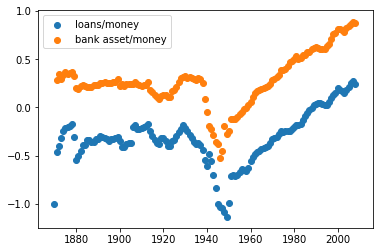

In [4]:
forPlot = myData[['year', 'loans1', 'bassets2', 'money', 'gdp', 'cpi', 'credit_to_money', 'bank_asset_to_money', 'credit_to_GDP', 'bankAsset_to_GDP', 'money_to_GDP']]
regroup = forPlot.groupby(['year']).mean()
#%matplotlib tk
%matplotlib inline
plt.scatter(regroup.index, np.log(regroup['credit_to_money']))
plt.scatter(regroup.index, np.log(regroup['bank_asset_to_money']))
plt.legend(['loans/money', 'bank asset/money'])

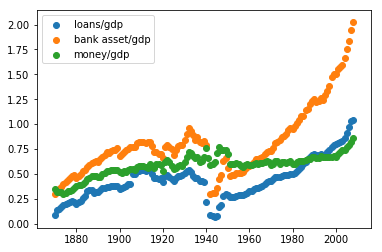

In [5]:
plt.scatter(regroup.index, regroup['credit_to_GDP'])
plt.scatter(regroup.index, regroup['bankAsset_to_GDP'])
plt.scatter(regroup.index, regroup['money_to_GDP'])
plt.legend(['loans/gdp', 'bank asset/gdp', 'money/gdp'])

In [6]:
exWar = myData[['year', 'country','loans1', 'bassets2', 'money', 'gdp', 'cpi', 'crisisST', 'credit_to_money', 'bank_asset_to_money', 'credit_to_GDP', 'bankAsset_to_GDP', 'money_to_GDP']]

exWar.drop(exWar[(exWar['year'] >= 1914) & (exWar['year'] <= 1919)].index, inplace = True)
exWar.drop(exWar[(exWar['year'] >= 1939) & (exWar['year'] <= 1947)].index, inplace = True)
exWar.drop(exWar[(exWar['year'] >= 1920) & (exWar['year'] <= 1925)&(exWar['country'] == 'GBR')].index, inplace = True)

exWar.index = range(exWar.shape[0])


preWar = exWar[exWar['year']<=1938]
postWar = exWar[exWar['year']>=1948]
preDes = preWar[['credit_to_GDP', 'bankAsset_to_GDP', 'money_to_GDP', 'credit_to_money', 'bank_asset_to_money']].describe()
postDes =es = postWar[['credit_to_GDP', 'bankAsset_to_GDP', 'money_to_GDP', 'credit_to_money', 'bank_asset_to_money']].describe()

print(preDes.iloc[:3])
print(postDes.iloc[:3])

       credit_to_GDP  bankAsset_to_GDP  money_to_GDP  credit_to_money  \
count     685.000000        611.000000    736.000000       662.000000   
mean        0.408977          0.714051      0.533292         0.735337   
std         0.359888          0.447337      0.207534         0.449343   

       bank_asset_to_money  
count           580.000000  
mean              1.282481  
std               0.566104  
       credit_to_GDP  bankAsset_to_GDP  money_to_GDP  credit_to_money  \
count     831.000000        828.000000    834.000000       833.000000   
mean        0.546975          1.013497      0.645801         0.838012   
std         0.423878          0.668770      0.240497         0.494226   

       bank_asset_to_money  
count           831.000000  
mean              1.575839  
std               0.752540  


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexin

In [7]:
np.log(postWar.groupby(['year']).mean()).diff().describe()[1:3]

/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,loans1,bassets2,money,gdp,cpi,crisisST,credit_to_money,bank_asset_to_money,credit_to_GDP,bankAsset_to_GDP,money_to_GDP
mean,0.128661,0.118789,0.109844,0.104404,0.041791,NaN,0.022129,0.017837,0.021795,0.019447,0.002452
std,0.063803,0.055795,0.055891,0.050616,0.026982,NaN,0.042620,0.026840,0.024521,0.037377,0.030227


In [8]:
np.log(preWar.groupby(['year']).mean()).diff().describe()[1:3]

/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/numpy/lib/function_base.py:4406: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


,loans1,bassets2,money,gdp,cpi,crisisST,credit_to_money,bank_asset_to_money,credit_to_GDP,bankAsset_to_GDP,money_to_GDP
mean,0.060365,0.054213,0.084300,0.034536,0.005878,NaN,0.009116,-0.000444,0.025341,0.016040,0.009622
std,0.176997,0.161224,0.243966,0.180931,0.136853,NaN,0.086974,0.032686,0.083379,0.051858,0.041934


In [9]:
finalData = exWar.drop(exWar[(exWar['year'] >= 1920) & (exWar['year'] <= 1925)].index)[['year', 'country', 'loans1', 'cpi', 'credit_to_GDP', 'crisisST']].dropna()
finalData.shape

(1433, 6)

In [10]:
finalData[finalData['crisisST']==1].shape

(59, 6)

In [11]:
finalData.to_csv('/home/lin/教材/MearchineLearning/assignmentOneData/CrisisPrediction.csv', index=False)